In [1]:
#Importing the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix ,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the data
data = pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
#Only the symptoms in the dataset would be used for this model. The data would be splitted first before cleaning and preprocessing to prevent leakage.
symptoms = [ 'YELLOW_FINGERS', 'ANXIETY', 'FATIGUE ',  'WHEEZING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
X = data[symptoms]
y = data.LUNG_CANCER
X.head()
 

,YELLOW_FINGERS,ANXIETY,FATIGUE,WHEEZING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,2,2,2,2,2,2,2,2
1,1,1,2,1,1,2,2,2
2,1,1,2,2,2,2,1,2
3,2,2,1,1,1,1,2,2
4,2,1,1,2,2,2,1,1


In [4]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state = 42, stratify = y)
#checking for missing entry
X_train.isnull().sum()
#No missing entry detected

YELLOW_FINGERS           0
ANXIETY                  0
FATIGUE                  0
WHEEZING                 0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
dtype: int64

In [5]:
#transforming the label to numerical values using LabelEncoder
le = LabelEncoder()
#fitting the data on only the training set to avoid data leakage
y_train= le.fit_transform(y_train)
y_test= le.transform(y_test)

In [6]:
#The target is a category so this is a classification problem
model =  RandomForestClassifier(n_estimators = 100, random_state = 42)
#fitting
model.fit(X_train, y_train)
#predicting
y_pred = model.predict(X_test)
#evaluating
print('The accuracy score of this Random Forest Classifier model is: {0:.1f}%'.format(100*accuracy_score(y_test, y_pred)))

The accuracy score of this Random Forest Classifier model is: 92.3%


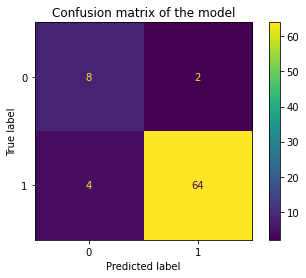

In [7]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix of the model')
plt.show()

The confusion matrix is a table that describes the performance of a classification model. This model was able to correctly predict positive cases 64 times out of 68 times and correctly predict negative cases 8 times out of 10. This shows a high precision of the model.

In [8]:
print('The precision of this model is {0:.1f}%'.format(100* precision_score(y_test,y_pred)))

print ('The recall score of this model is {0:.1f}%'.format(100*recall_score(y_test, y_pred)))

print('The harmonic mean of the precision score and recall score is:', f1_score(y_test,y_pred))

The precision of this model is 97.0%
The recall score of this model is 94.1%
The harmonic mean of the precision score and recall score is: 0.955223880597015


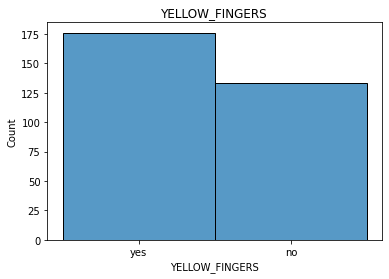

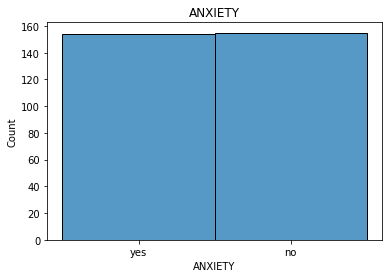

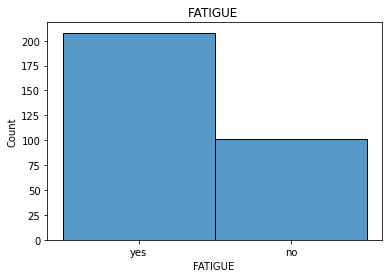

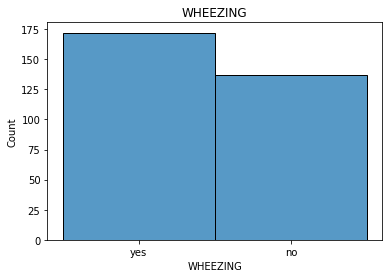

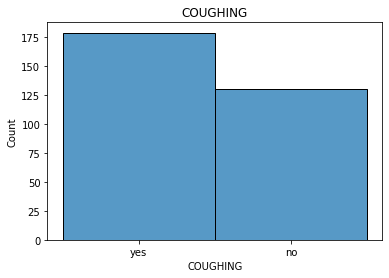

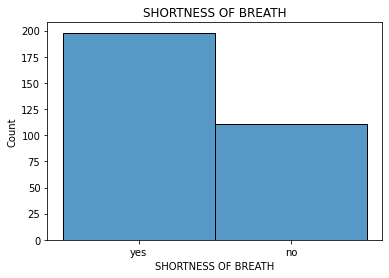

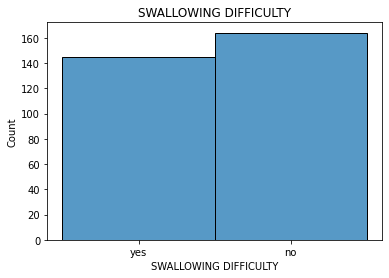

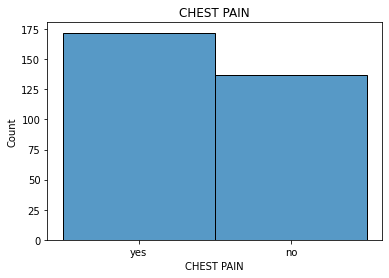

In [9]:
#Visualizing each symptom
key = {2: 'yes', 1: 'no'}
for sys in symptoms:
	sns.histplot(X[sys].replace(key))
	plt.title(sys)
	plt.show()

These plot shows that a person who experiences shortness of breath, who coughs and wheezes often, has yellow fingers and is easily fatigued, has a high probability of being positive for lung cancer.

In [10]:
#features importance
Symptoms_importance = pd.DataFrame(  {"Symptoms": list(X.columns), "importance": model.feature_importances_}).sort_values("importance", ascending=False)
# Display
print(Symptoms_importance)

                Symptoms  importance
0         YELLOW_FINGERS    0.152723
4               COUGHING    0.150052
7             CHEST PAIN    0.133490
2               FATIGUE     0.124247
3               WHEEZING    0.122971
1                ANXIETY    0.120900
5    SHORTNESS OF BREATH    0.106120
6  SWALLOWING DIFFICULTY    0.089497


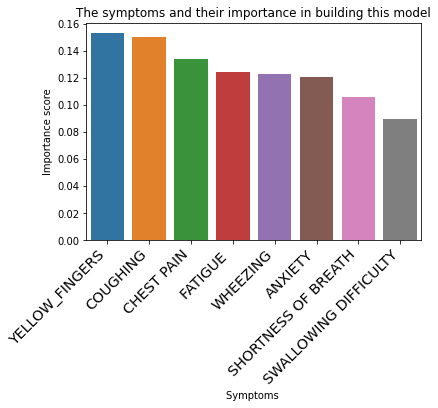

In [11]:
# Creating a bar plot
sns.barplot(x=Symptoms_importance.Symptoms, y=Symptoms_importance.importance)
plt.xlabel("Symptoms ")
plt.ylabel("Importance score")
plt.title("The symptoms and their importance in building this model")
plt.xticks( rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")
plt.show()